In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\P10414651\Documents\Mohan\DS with Python\Data-Science-Projects-master\Data-Science-Projects-master\Loan_Prediction_Analytics_Vidhya_Undersampling_Oversampling\train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


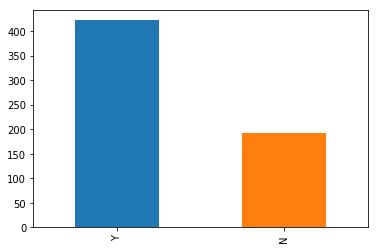

In [6]:
df['Loan_Status'].value_counts().plot.bar()

In [8]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
df_Y = df[df['Loan_Status']=='Y']
df_N = df[df['Loan_Status']=='N']

In [11]:
count_Y, count_N = df['Loan_Status'].value_counts()
df_Y_under = df_Y.sample(count_N)

In [12]:
df_under = pd.concat([df_Y_under, df_N],axis=0)

In [13]:
df_under.shape

(384, 13)

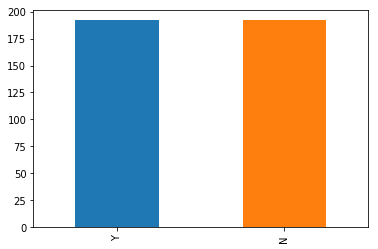

In [14]:
df_under['Loan_Status'].value_counts().plot.bar()

In [16]:
df_under['Loan_Status'].value_counts()

Y    192
N    192
Name: Loan_Status, dtype: int64

In [18]:
df_N_over = df_N.sample(count_Y,replace=True)

In [19]:
df_N_over.shape

(422, 13)

In [20]:
df_Y.shape

(422, 13)

In [22]:
df_over = pd.concat([df_Y, df_N_over],axis=0)

In [23]:
df_over.shape

(844, 13)

In [24]:
df_under.shape

(384, 13)

In [25]:
df_over.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,844.000000,844.00000,810.000000,830.000000,774.000000
mean,5538.888626,1577.46673,149.307407,345.397590,0.775194
std,6788.259419,2714.07932,84.603551,64.525089,0.417725
min,150.000000,0.00000,17.000000,12.000000,0.000000
25%,2947.000000,0.00000,103.000000,360.000000,1.000000
50%,3815.000000,1105.50000,130.000000,360.000000,1.000000
75%,5803.750000,2330.75000,172.000000,360.000000,1.000000
max,81000.000000,41667.00000,700.000000,480.000000,1.000000


In [26]:
df_over.isnull().sum()

Loan_ID               0
Gender               18
Married               3
Dependents           22
Education             0
Self_Employed        50
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           34
Loan_Amount_Term     14
Credit_History       70
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
df_under.isnull().sum()

Loan_ID               0
Gender                8
Married               2
Dependents           12
Education             0
Self_Employed        19
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           15
Loan_Amount_Term     12
Credit_History       26
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
df_over['Gender'].fillna(df_over['Gender'].mode()[0],inplace=True)
df_over['Married'].fillna(df_over['Married'].mode()[0],inplace=True)
df_over['Dependents'].fillna(df_over['Dependents'].mode()[0],inplace=True)
df_over['Self_Employed'].fillna(df_over['Self_Employed'].mode()[0],inplace=True)
df_over['LoanAmount'].fillna(df_over['LoanAmount'].mean(),inplace=True)
df_over['Loan_Amount_Term'].fillna(df_over['Loan_Amount_Term'].mean(),inplace=True)
df_over['Credit_History'].fillna(df_over['Credit_History'].mode()[0],inplace=True)

df_under['Gender'].fillna(df_under['Gender'].mode()[0],inplace=True)
df_under['Married'].fillna(df_under['Married'].mode()[0],inplace=True)
df_under['Dependents'].fillna(df_under['Dependents'].mode()[0],inplace=True)
df_under['Self_Employed'].fillna(df_under['Self_Employed'].mode()[0],inplace=True)
df_under['LoanAmount'].fillna(df_under['LoanAmount'].mean(),inplace=True)
df_under['Loan_Amount_Term'].fillna(df_under['Loan_Amount_Term'].mean(),inplace=True)
df_under['Credit_History'].fillna(df_under['Credit_History'].mode()[0],inplace=True)

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [31]:
df_over.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
df_under.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
df_over = df_over.iloc[:,1:]

In [35]:
df_over['Gender'].value_counts()

Male      679
Female    165
Name: Gender, dtype: int64

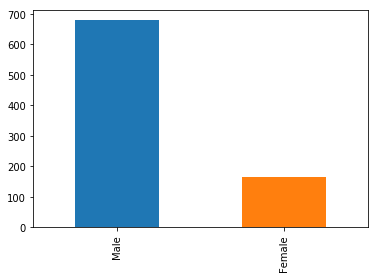

In [36]:
df_over['Gender'].value_counts().plot.bar()

In [37]:
df_over[df_over['Loan_Status']=='Y']['Gender'].value_counts()

Male      347
Female     75
Name: Gender, dtype: int64

In [38]:
df_over[df_over['Loan_Status']=='N']['Gender'].value_counts()

Male      332
Female     90
Name: Gender, dtype: int64

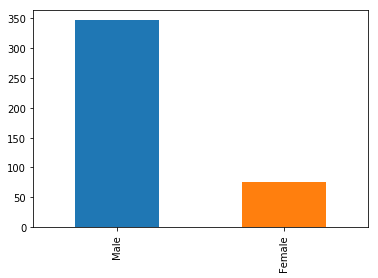

In [39]:
df_over[df_over['Loan_Status']=='Y']['Gender'].value_counts().plot.bar()

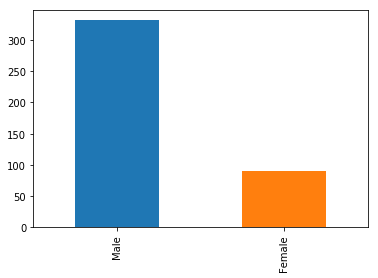

In [40]:
df_over[df_over['Loan_Status']=='N']['Gender'].value_counts().plot.bar()

In [41]:
a = 347/679*100
b = 75/165*100

In [42]:
print('% of Male who got loan approved:',a)
print ('% of Female who got loan approved:',b)

% of Male who got loan approved: 51.104565537555224
% of Female who got loan approved: 45.45454545454545


In [43]:
df_over['Married'].value_counts()

Yes    544
No     300
Name: Married, dtype: int64

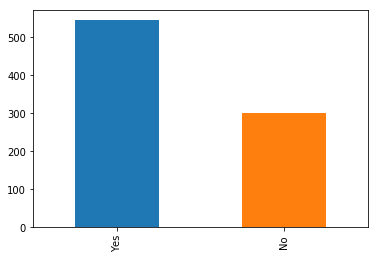

In [44]:
df_over['Married'].value_counts().plot.bar()

In [45]:
df_over[df_over['Loan_Status']=='Y']['Married'].value_counts()

Yes    288
No     134
Name: Married, dtype: int64

In [46]:
df_over[df_over['Loan_Status']=='N']['Married'].value_counts()

Yes    256
No     166
Name: Married, dtype: int64

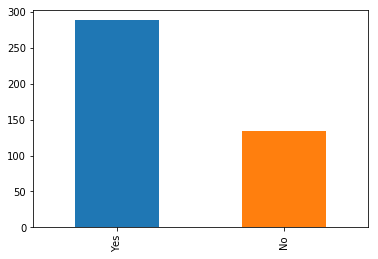

In [47]:
df_over[df_over['Loan_Status']=='Y']['Married'].value_counts().plot.bar()

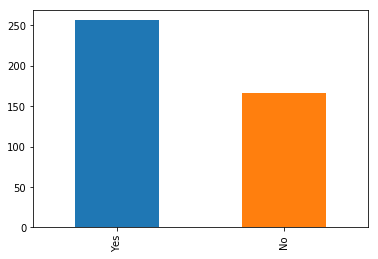

In [48]:
df_over[df_over['Loan_Status']=='N']['Married'].value_counts().plot.bar()

In [49]:
a = 288/544*100
b = 134/300*100

In [50]:
print('% of Married who got loan approved:',a)
print('% of Unmarried who got loan approved:',b)

% of Married who got loan approved: 52.94117647058824
% of Unmarried who got loan approved: 44.666666666666664


In [51]:
df_over['Dependents'].value_counts()

0     481
1     154
2     135
3+     74
Name: Dependents, dtype: int64

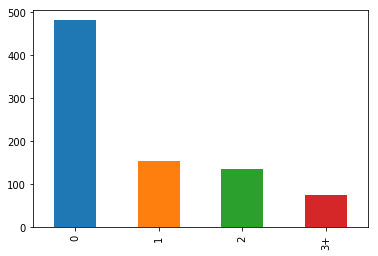

In [52]:
df_over['Dependents'].value_counts().plot.bar()

In [53]:
df_over[df_over['Loan_Status']=='Y']['Dependents'].value_counts()

0     247
2      76
1      66
3+     33
Name: Dependents, dtype: int64

In [54]:
df_over[df_over['Loan_Status']=='N']['Dependents'].value_counts()

0     234
1      88
2      59
3+     41
Name: Dependents, dtype: int64

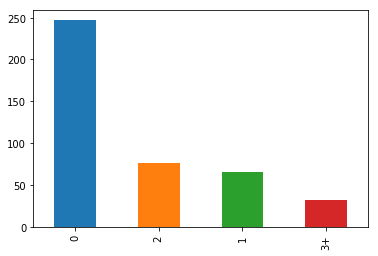

In [55]:
df_over[df_over['Loan_Status']=='Y']['Dependents'].value_counts().plot.bar()

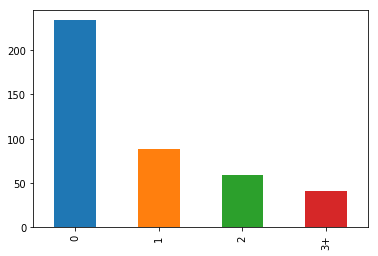

In [56]:
df_over[df_over['Loan_Status']=='N']['Dependents'].value_counts().plot.bar()

In [57]:
a = 247/481*100
b = 76/154*100
c = 66/135*100
d = 33/74*100

In [58]:
print('% of applicants with 0 dependents who got loan approved:',a)
print('% of applicants with 1 dependents who got loan approved:',b)
print('% of applicants with 2 dependents who got loan approved:',c)
print('% of applicants with 3+ dependents who got loan approved:',d)

% of applicants with 0 dependents who got loan approved: 51.35135135135135
% of applicants with 1 dependents who got loan approved: 49.35064935064935
% of applicants with 2 dependents who got loan approved: 48.888888888888886
% of applicants with 3+ dependents who got loan approved: 44.5945945945946


In [59]:
df_over['Education'].value_counts()

Graduate        640
Not Graduate    204
Name: Education, dtype: int64

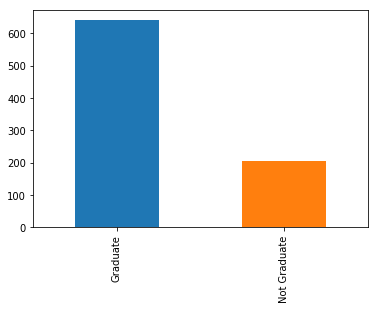

In [60]:
df_over['Education'].value_counts().plot.bar()

In [61]:
df_over[df_over['Loan_Status']=='Y']['Education'].value_counts()

Graduate        340
Not Graduate     82
Name: Education, dtype: int64

In [62]:
df_over[df_over['Loan_Status']=='N']['Education'].value_counts()

Graduate        300
Not Graduate    122
Name: Education, dtype: int64

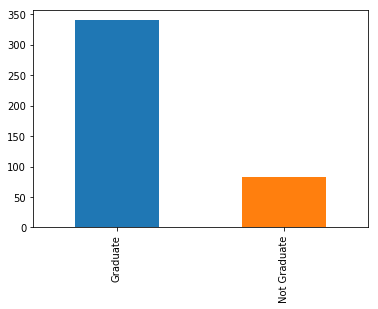

In [63]:
df_over[df_over['Loan_Status']=='Y']['Education'].value_counts().plot.bar()

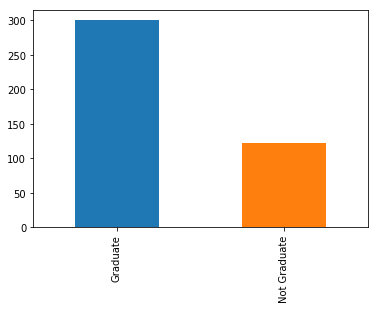

In [64]:
df_over[df_over['Loan_Status']=='N']['Education'].value_counts().plot.bar()

In [65]:
a = 340/640*100
b = 82/204*100

In [66]:
print('% of Graduates who got loan approved:',a)
print('% of Non-Graduates who got loan approved:',b)

% of Graduates who got loan approved: 53.125
% of Non-Graduates who got loan approved: 40.19607843137255


In [67]:
df_over['Self_Employed'].value_counts()

No     733
Yes    111
Name: Self_Employed, dtype: int64

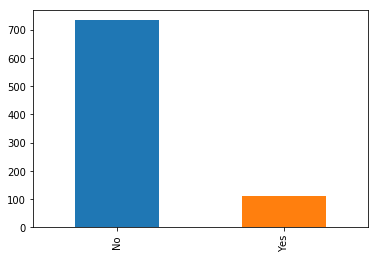

In [68]:
df_over['Self_Employed'].value_counts().plot.bar()

In [70]:
df_over[df_over['Loan_Status']=='Y']['Self_Employed'].value_counts()

No     366
Yes     56
Name: Self_Employed, dtype: int64

In [71]:
df_over[df_over['Loan_Status']=='N']['Self_Employed'].value_counts()

No     367
Yes     55
Name: Self_Employed, dtype: int64

In [72]:
a = 366/733*100
b = 56/111*100

In [73]:
print('% of Self_Employeed who got loan approved:',a)
print('% of Non-Self_Employed who got loan approved:',b)

% of Self_Employeed who got loan approved: 49.931787175989086
% of Non-Self_Employed who got loan approved: 50.45045045045045


In [74]:
df_over['Credit_History'].value_counts()

1.0    670
0.0    174
Name: Credit_History, dtype: int64

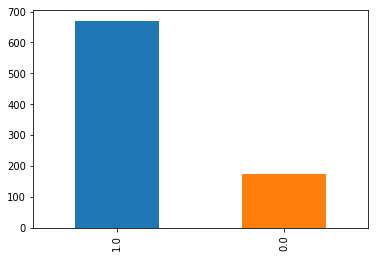

In [75]:
df_over['Credit_History'].value_counts().plot.bar()

In [76]:
df_over[df_over['Loan_Status']=='Y']['Credit_History'].value_counts()

1.0    415
0.0      7
Name: Credit_History, dtype: int64

In [77]:
df_over[df_over['Loan_Status']=='N']['Credit_History'].value_counts()

1.0    255
0.0    167
Name: Credit_History, dtype: int64

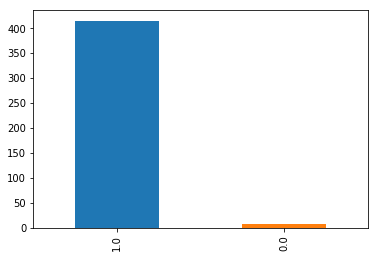

In [78]:
df_over[df_over['Loan_Status']=='Y']['Credit_History'].value_counts().plot.bar()

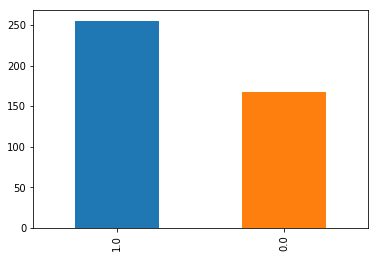

In [79]:
df_over[df_over['Loan_Status']=='N']['Credit_History'].value_counts().plot.bar()

In [80]:
a = 415/670*100
b = 7/174*100

In [81]:
print('% of applicants who had credit history got loan approved:',a)
print('% of applicants who has no credit history got loan approved',b)

% of applicants who had credit history got loan approved: 61.940298507462686
% of applicants who has no credit history got loan approved 4.022988505747127


In [82]:
df_over['Property_Area'].value_counts()

Semiurban    307
Urban        271
Rural        266
Name: Property_Area, dtype: int64

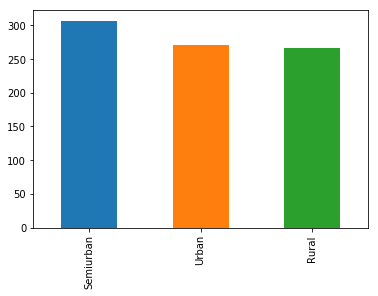

In [83]:
df_over['Property_Area'].value_counts().plot.bar()

In [84]:
df_over[df_over['Loan_Status']=='Y']['Property_Area'].value_counts()

Semiurban    179
Urban        133
Rural        110
Name: Property_Area, dtype: int64

In [85]:
df_over[df_over['Loan_Status']=='N']['Property_Area'].value_counts()

Rural        156
Urban        138
Semiurban    128
Name: Property_Area, dtype: int64

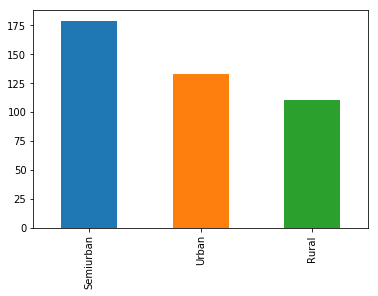

In [86]:
df_over[df_over['Loan_Status']=='Y']['Property_Area'].value_counts().plot.bar()

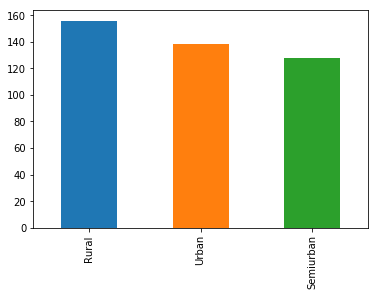

In [87]:
df_over[df_over['Loan_Status']=='N']['Property_Area'].value_counts().plot.bar()

In [88]:
a = 179/307*100
b = 133/271*100
c = 110/266*100

In [89]:
print('% of applicants who had property in Semi-Urban got loan:',a)
print('% of applicants who had property in Urban got loan:',b)
print('% of applicants who had property in Rural got loan:',c)

% of applicants who had property in Semi-Urban got loan: 58.306188925081436
% of applicants who had property in Urban got loan: 49.07749077490775
% of applicants who had property in Rural got loan: 41.35338345864661


In [90]:
df_over.skew()

ApplicantIncome      6.992123
CoapplicantIncome    7.078007
LoanAmount           2.599653
Loan_Amount_Term    -2.169716
Credit_History      -1.455267
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECDCB4CA20>,
      dtype=object)

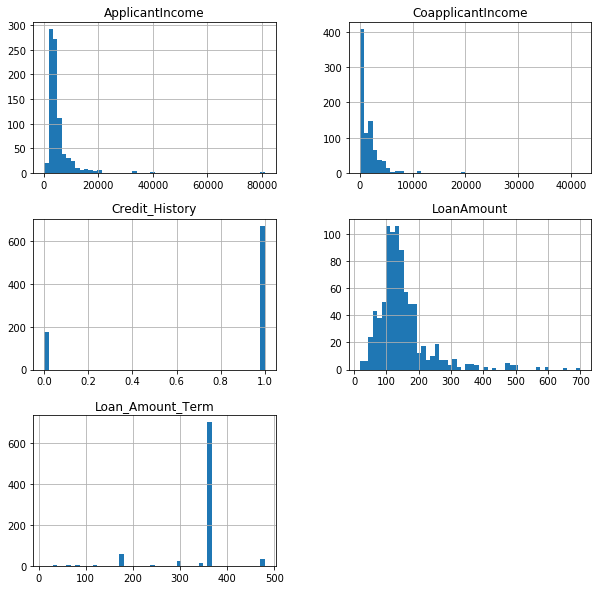

In [91]:
plt.rcParams['figure.figsize'] = [10,10]
df_over.hist(bins=50)

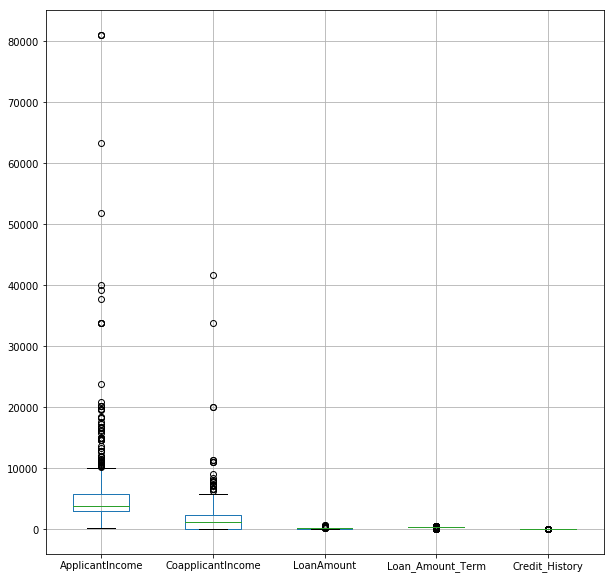

In [92]:
df_over.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECDCB4C9E8>,
      dtype=object)

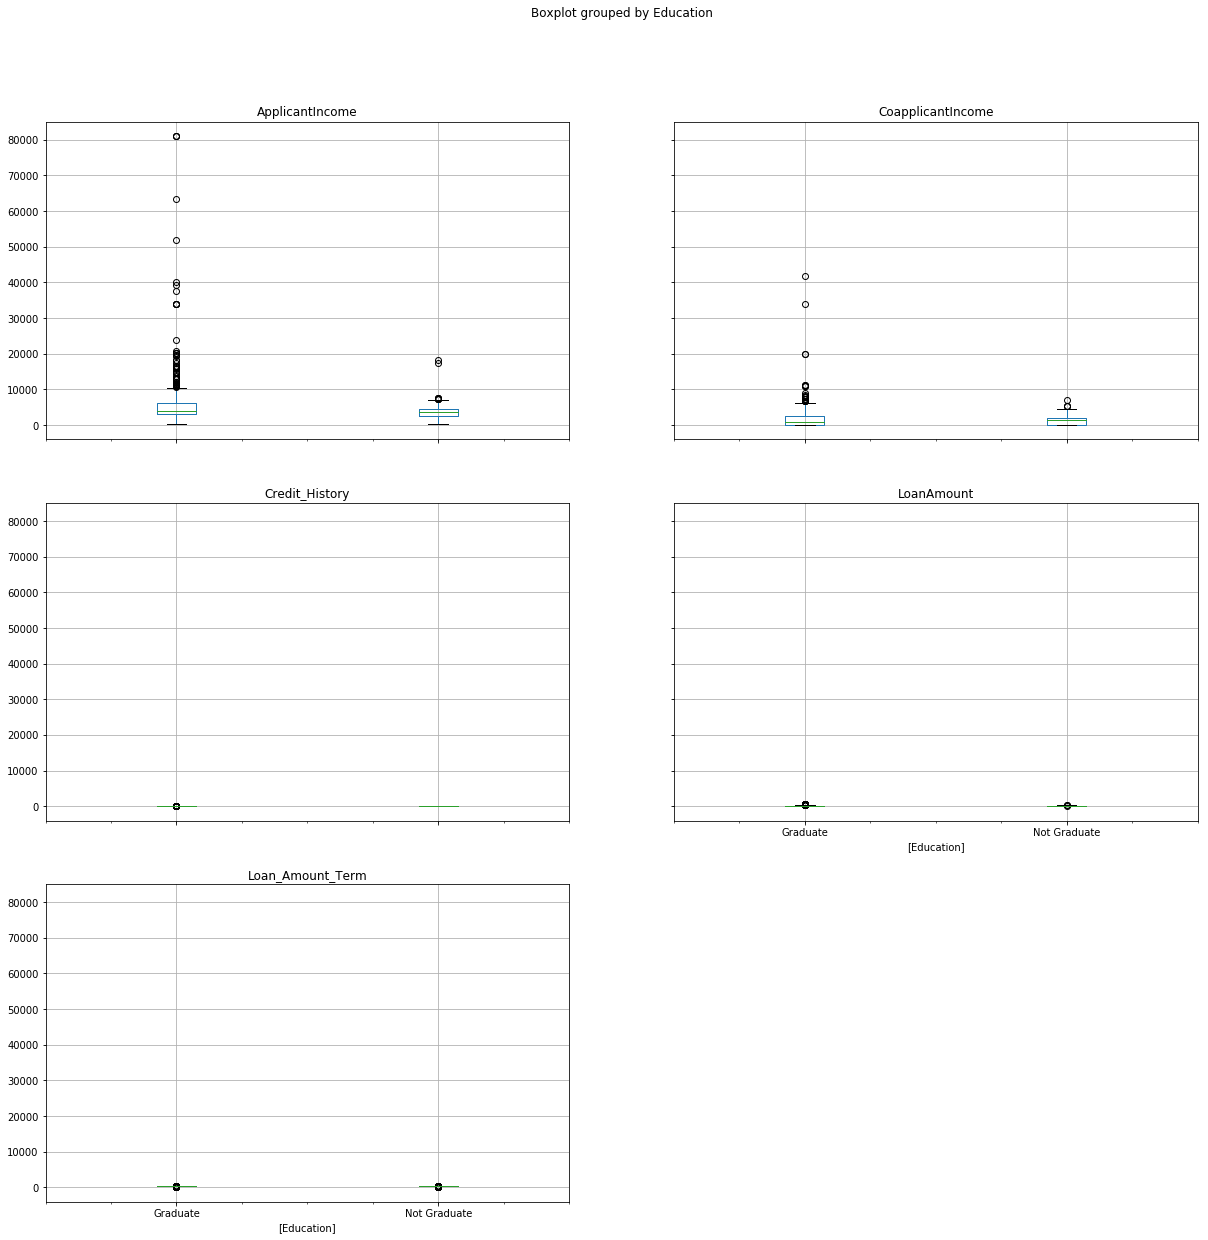

In [93]:
plt.rcParams['figure.figsize'] = [20,20]
df_over.boxplot(by='Education')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECDD1B1B38>,
      dtype=object)

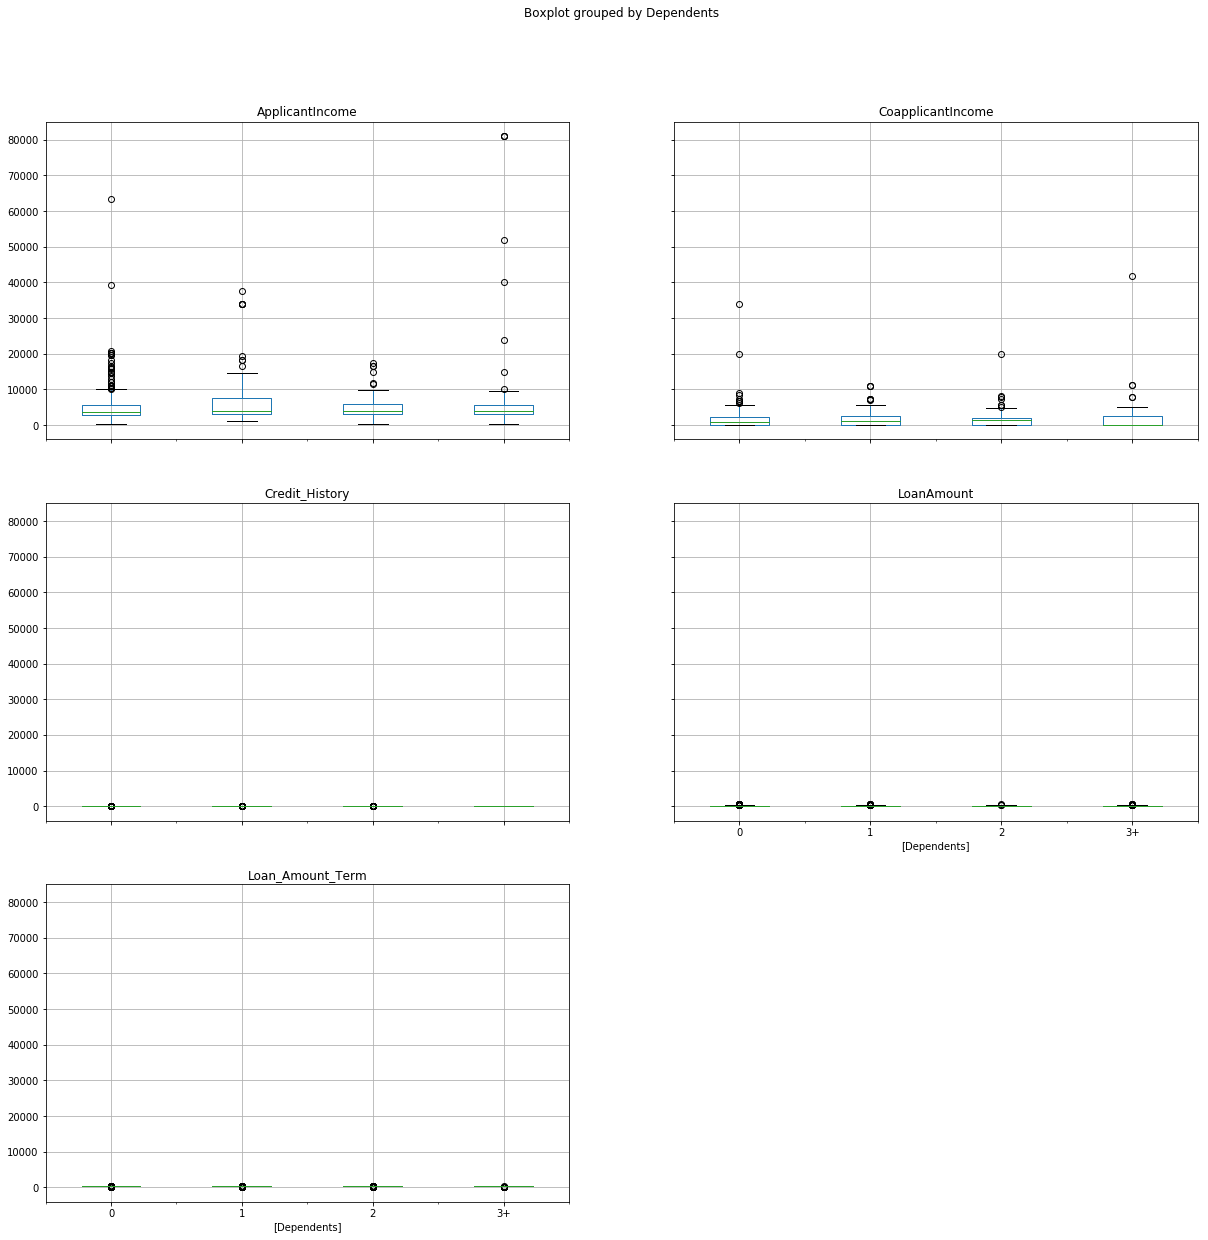

In [94]:
df_over.boxplot(by='Dependents')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ECDD906898>,
      dtype=object)

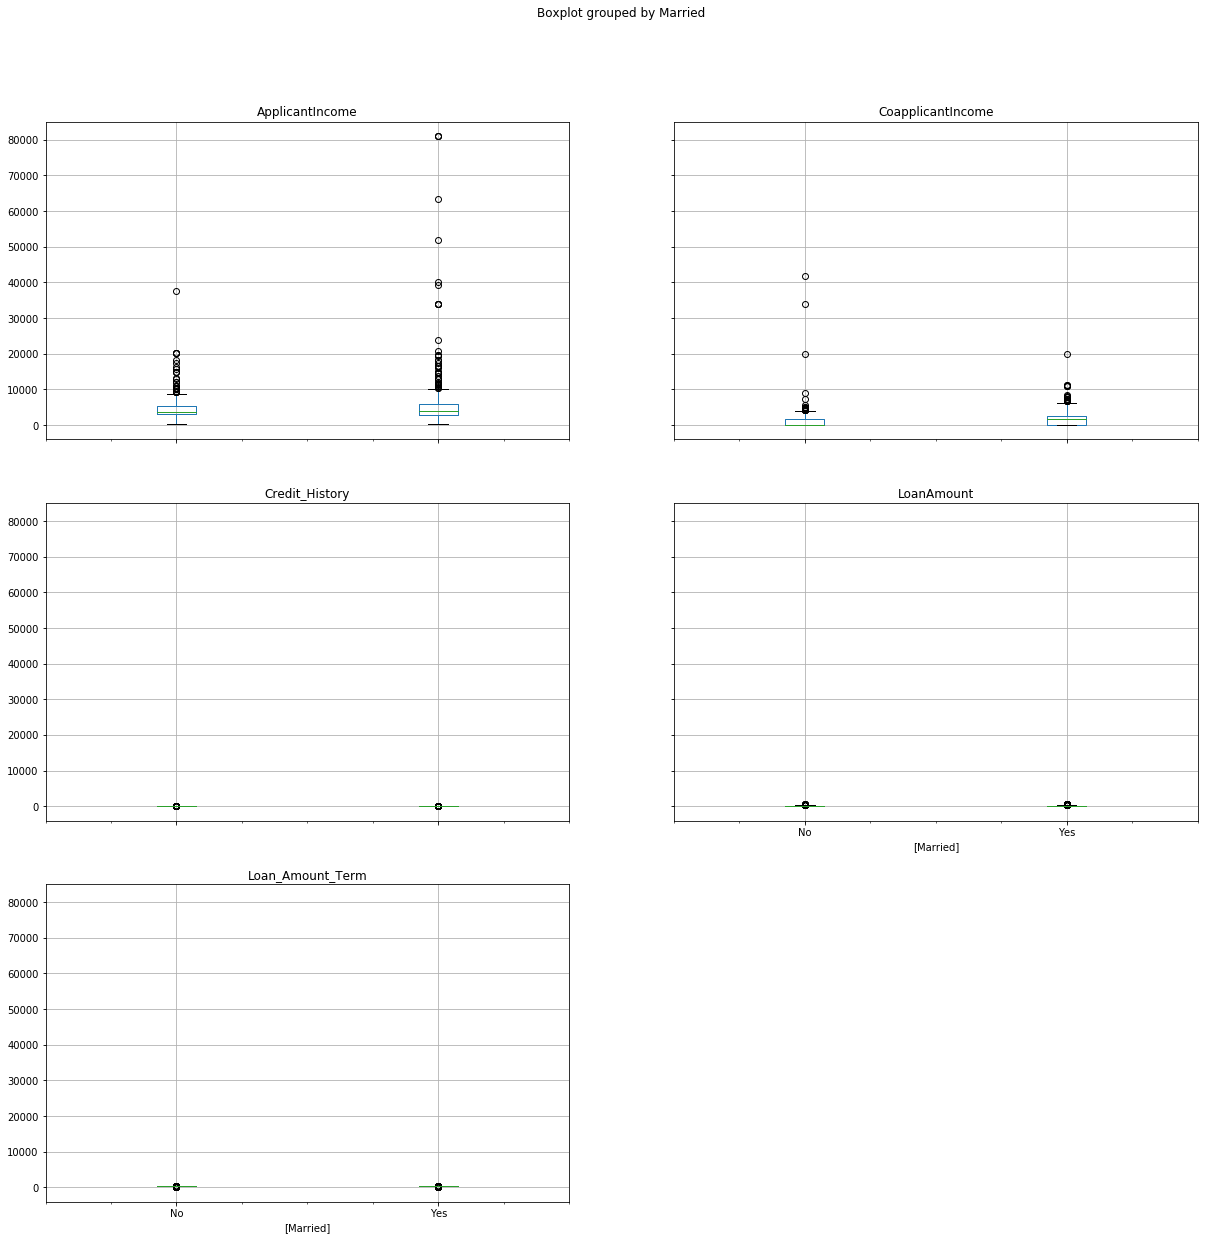

In [95]:
df_over.boxplot(by='Married')

In [96]:
df_over['Total_Income'] = df_over['ApplicantIncome']+df_over['CoapplicantIncome']
df_under['Total_Income'] = df_under['ApplicantIncome']+df_under['CoapplicantIncome']
df['Total_Income'] = df['ApplicantIncome']+df['CoapplicantIncome']

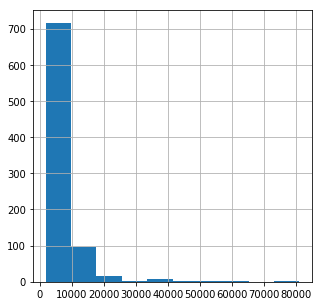

In [97]:
plt.rcParams['figure.figsize'] = [5,5]
df_over['Total_Income'].hist()

In [98]:
df_over['Total_Income_Log']=np.log(df_over['Total_Income'])
df_under['Total_Income_Log']=np.log(df_under['Total_Income'])
df['Total_Income_Log']=np.log(df['Total_Income'])                                    

Skewness 1.1144590600817104


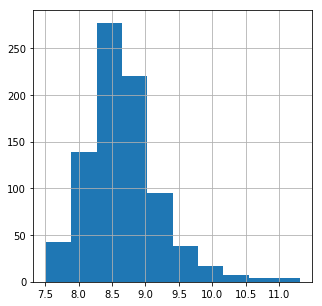

In [100]:
df_over['Total_Income_Log'].hist()
print('Skewness',df_over['Total_Income_Log'].skew())

In [101]:
df_over.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_Log
0,Male,No,0,Graduate,No,5849,0.0,149.307407,360.0,1.0,Urban,Y,5849.0,8.674026
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,9613.0,9.170872


In [103]:
cat_vars=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in cat_vars:
    df_over[i]=encoder.fit_transform(df_over[i])
for i in cat_vars:
    df_under[i]=encoder.fit_transform(df_under[i])
for i in cat_vars:
    df[i]=encoder.fit_transform(df[i])

In [104]:
df_over.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_Log
0,1,0,0,0,0,5849,0.0,149.307407,360.0,1,2,1,5849.0,8.674026
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1,3000.0,8.006368
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1,4941.0,8.505323
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1,6000.0,8.699515
5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1,2,1,9613.0,9.170872


In [105]:
df_under.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_Log
159,LP001552,1,1,0,0,0,4583,5625.0,255.000000,360.0,1,1,1,10208.0,9.230927
488,LP002555,1,1,2,0,1,4583,2083.0,160.000000,360.0,1,1,1,6666.0,8.804775
94,LP001325,1,0,0,1,0,3620,0.0,25.000000,120.0,1,1,1,3620.0,8.194229
81,LP001266,1,1,1,0,1,2395,0.0,148.298103,360.0,1,1,1,2395.0,7.781139
21,LP001046,1,1,1,0,0,5955,5625.0,315.000000,360.0,1,2,1,11580.0,9.357035


In [106]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_Log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1,6000.0,8.699515


In [107]:
df_over.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'Total_Income_Log'],
      dtype='object')

In [108]:
x_over=df_over[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Total_Income_Log', 'LoanAmount', 
                'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
x_under=df_under[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Total_Income_Log', 'LoanAmount', 
                'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

y_over=df_over['Loan_Status']
y_under=df_under['Loan_Status']

x=df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Total_Income_Log', 'LoanAmount', 
                'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y=df['Loan_Status']

In [110]:
from sklearn.model_selection import train_test_split
x_over_train,x_over_test,y_over_train,y_over_test=train_test_split(x_over, y_over, test_size=0.2,random_state=3)

x_under_train,x_under_test,y_under_train,y_under_test=train_test_split(x_under, y_under, test_size=0.2,random_state=3)

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,random_state=3)

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model=RandomForestClassifier(n_estimators=15,random_state=3)
model.fit(x_over_train, y_over_train)
y_over_pred=model.predict(x_over_test)
print('Accuracy score is:',accuracy_score(y_over_pred,y_over_test))
print('Classification report\n',classification_report(y_over_pred,y_over_test))
print('Confusion matrix\n',confusion_matrix(y_over_pred,y_over_test))

Accuracy score is: 0.8165680473372781
Classification report
              precision    recall  f1-score   support

          0       0.80      0.81      0.81        80
          1       0.83      0.82      0.82        89

avg / total       0.82      0.82      0.82       169

Confusion matrix
 [[65 15]
 [16 73]]


In [113]:
model=RandomForestClassifier(n_estimators=15,random_state=3)
model.fit(x_under_train, y_under_train)
y_under_pred=model.predict(x_under_test)
print('Accuracy score is:',accuracy_score(y_under_pred,y_under_test))
print('Classification report\n',classification_report(y_under_pred,y_under_test))
print('Confusion matrix\n',confusion_matrix(y_under_pred,y_under_test))

Accuracy score is: 0.7142857142857143
Classification report
              precision    recall  f1-score   support

          0       0.68      0.76      0.72        37
          1       0.75      0.68      0.71        40

avg / total       0.72      0.71      0.71        77

Confusion matrix
 [[28  9]
 [13 27]]


In [114]:
model=RandomForestClassifier(n_estimators=15,random_state=3)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print('Accuracy score is:',accuracy_score(y_pred,y_test))
print('Classification report\n',classification_report(y_pred,y_test))
print('Confusion matrix\n',confusion_matrix(y_pred,y_test))

Accuracy score is: 0.8130081300813008
Classification report
              precision    recall  f1-score   support

          0       0.54      0.60      0.57        25
          1       0.89      0.87      0.88        98

avg / total       0.82      0.81      0.82       123

Confusion matrix
 [[15 10]
 [13 85]]


In [115]:
model=RandomForestClassifier(n_estimators=15,random_state=3,class_weight='balanced')
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print('Accuracy score is:',accuracy_score(y_pred,y_test))
print('Classification report\n',classification_report(y_pred,y_test))
print('Confusion matrix\n',confusion_matrix(y_pred,y_test))

Accuracy score is: 0.8048780487804879
Classification report
              precision    recall  f1-score   support

          0       0.46      0.59      0.52        22
          1       0.91      0.85      0.88       101

avg / total       0.83      0.80      0.81       123

Confusion matrix
 [[13  9]
 [15 86]]


In [117]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(random_state=3)
model.fit(x_over_train, y_over_train)
y_over_pred=model.predict(x_over_test)
print('Accuracy score is:',accuracy_score(y_over_pred,y_over_test))
print('Classification report\n',classification_report(y_over_pred,y_over_test))
print('Confusion matrix\n',confusion_matrix(y_over_pred,y_over_test))

Accuracy score is: 0.8284023668639053
Classification report
              precision    recall  f1-score   support

          0       0.77      0.86      0.81        72
          1       0.89      0.80      0.84        97

avg / total       0.83      0.83      0.83       169

Confusion matrix
 [[62 10]
 [19 78]]


In [118]:
model=GradientBoostingClassifier(random_state=3)
model.fit(x_under_train, y_under_train)
y_under_pred=model.predict(x_under_test)
print('Accuracy score is:',accuracy_score(y_under_pred,y_under_test))
print('Classification report\n',classification_report(y_under_pred,y_under_test))
print('Confusion matrix\n',confusion_matrix(y_under_pred,y_under_test))

Accuracy score is: 0.6883116883116883
Classification report
              precision    recall  f1-score   support

          0       0.56      0.79      0.66        29
          1       0.83      0.62      0.71        48

avg / total       0.73      0.69      0.69        77

Confusion matrix
 [[23  6]
 [18 30]]


In [119]:
model=GradientBoostingClassifier(random_state=3)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print('Accuracy score is:',accuracy_score(y_pred,y_test))
print('Classification report\n',classification_report(y_pred,y_test))
print('Confusion matrix\n',confusion_matrix(y_under_pred,y_under_test))

Accuracy score is: 0.8211382113821138
Classification report
              precision    recall  f1-score   support

          0       0.46      0.65      0.54        20
          1       0.93      0.85      0.89       103

avg / total       0.85      0.82      0.83       123

Confusion matrix
 [[23  6]
 [18 30]]
